In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv('../data/web_imdb_clean/movies.csv', sep=';')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdbId           1553 non-null   object 
 1   year             1553 non-null   float64
 2   spanishTitle     1553 non-null   object 
 3   originalTitle    1553 non-null   object 
 4   englishTitle     1553 non-null   object 
 5   ratingImdb       1553 non-null   float64
 6   numVotes         1553 non-null   float64
 7   metascore        1553 non-null   float64
 8   isAdult          1553 non-null   float64
 9   certificate      1497 non-null   object 
 10  runtimeMinutes   1553 non-null   float64
 11  genres           1553 non-null   object 
 12  directors        1553 non-null   object 
 13  writers          1550 non-null   object 
 14  stars            1550 non-null   object 
 15  countries        1553 non-null   object 
 16  companies        1549 non-null   object 
 17  awards        

---
#### Carga `title_basics` para crear gráfica de total de películas disponibles en IMDb

In [3]:
annos = np.arange(2010,2022)

title_basics = pd.read_csv('../data/imdb/title_basics.tsv', sep='\t', na_values=["\\N"])

# Número de pelis por año en IMDb
n_pelis = []
for anno in annos:
    pelis = len(title_basics[(title_basics.titleType=='movie') & (title_basics.startYear==anno)])
    n_pelis.append(pelis)
    print('Películas', anno, pelis)

C:\Users\casiopa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Películas 2010 12218
Películas 2011 13148
Películas 2012 14105
Películas 2013 14791
Películas 2014 15862
Películas 2015 16412
Películas 2016 17609
Películas 2017 17967
Películas 2018 17819
Películas 2019 17181
Películas 2020 14632
Películas 2021 11842


findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


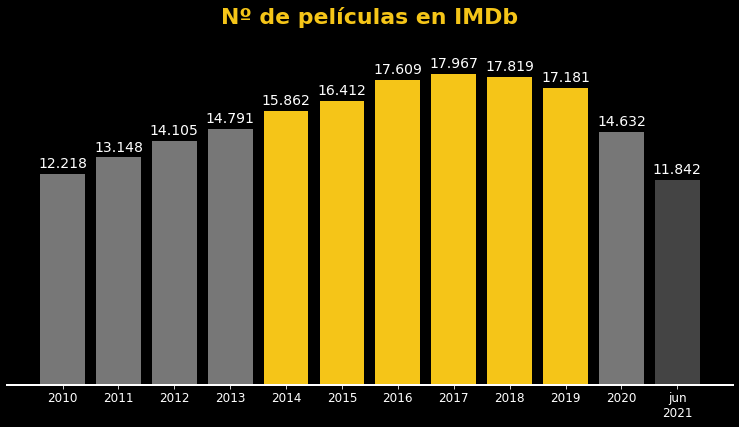

In [4]:
# libraries
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(13,6))

ax.bar(annos, n_pelis, edgecolor = "none",
       color = ['#777', '#777', '#777', '#777', '#f5c518', '#f5c518', '#f5c518', '#f5c518', '#f5c518', '#f5c518', '#777', '#444'])

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(False)

plt.title('Nº de películas en IMDb', fontdict={'fontname': 'Roboto', 'fontsize': 22, 'fontweight': 'bold', 'color': '#f5c518'}, pad=35)

annos_xticks = annos.astype(str)
annos_xticks[11] = 'jun\n2021'
plt.xticks(annos, labels=annos_xticks, fontsize=12)

# Pintar valores sobre las barras
for anno, peli in tuple(zip(annos, n_pelis)):
    ax.text(anno, peli+200, '{0:,}'.format(peli).replace(',', '.'), va='bottom', ha = 'center', fontsize = 14, fontweight = 'regular');
    
#plt.savefig('images/IMDb_pelis_anno.png', dpi=300, bbox_inches='tight', transparent=True)

In [350]:
np.sum([15862, 16412, 17609, 17967, 17819, 17181])

102850

In [5]:
del title_basics

---
# Inspección dataset `movies`

In [313]:
#Número de pelis finales con toda la info disponible

nmovies = movies.groupby('year')['year'].count()
print(nmovies)
print(nmovies.index.astype(int))
print(nmovies.values)

year
2014.0    306
2015.0    285
2016.0    296
2017.0    238
2018.0    241
2019.0    187
Name: year, dtype: int64
Int64Index([2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='year')
[306 285 296 238 241 187]


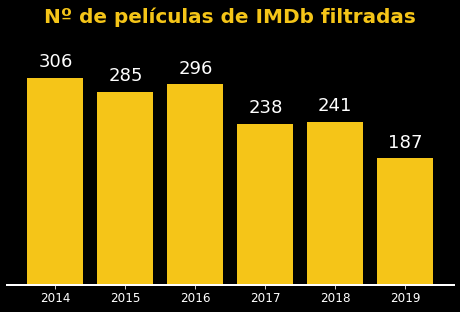

In [316]:
# libraries
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(nmovies.index.astype(int), nmovies.values, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(False)

plt.title('Nº de películas de IMDb filtradas', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=45)


plt.xticks(nmovies.index.astype(int), fontsize=12)

# Pintar valores sobre las barras
for anno, peli in tuple(zip(nmovies.index.astype(int), nmovies.values)):
    ax.text(anno, peli+10, '{0:,}'.format(peli).replace(',', '.'), va='bottom', ha = 'center', fontsize = 18, fontweight = 'regular');
    
plt.savefig('images/pelis_anno.png', dpi=300, bbox_inches='tight', transparent=True)

---
# `ratingImdb`

In [8]:
movies.ratingImdb.describe()

count    1553.000000
mean        6.367418
std         0.947464
min         1.400000
25%         5.800000
50%         6.400000
75%         7.000000
max         8.600000
Name: ratingImdb, dtype: float64

In [9]:
movies['ratingImdb'].max()

8.6

In [10]:
# Preparing data
n_mvps = 10
mvps_rating = movies[['imdbId', 'spanishTitle', 'ratingImdb']].sort_values(by='ratingImdb', ascending=False)[:n_mvps]
mvps_rating

,imdbId,spanishTitle,ratingImdb
8,tt0816692,Interstellar,8.6
1120,tt6842524,"Hare Krishna! The Mantra, the Movement and the...",8.6
1481,tt6751668,Parásitos,8.6
202,tt2582802,Whiplash,8.5
1187,tt4154756,Vengadores: Infinity War,8.4
1495,tt7286456,Joker,8.4
934,tt2380307,Coco,8.4
1357,tt8267604,Cafarnaúm,8.4
1202,tt4633694,Spider-Man: un nuevo universo,8.4
1419,tt4154796,Vengadores: Endgame,8.4


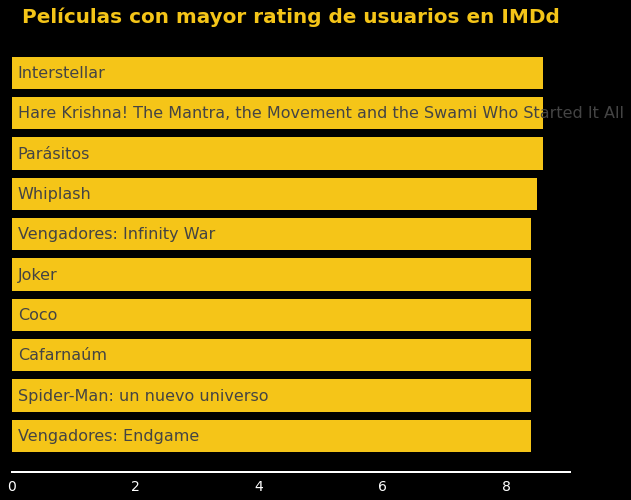

In [354]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

# Preparing data
n_mvps = 10
mvps_rating = movies[['spanishTitle', 'ratingImdb']].sort_values(by='ratingImdb', ascending=False)[:n_mvps]

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(range(n_mvps+1,1,-1), mvps_rating.ratingImdb, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False)
ax.xaxis.set_ticks_position('none')

plt.xticks(fontsize=14)
plt.title('Películas con mayor rating de usuarios en IMDd', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=15)


# Pintar nombre sobre las barras
for pos, name in tuple(zip(range(n_mvps+1,1,-1), mvps_rating.spanishTitle)):
    ax.text(.1, pos, name, va='center', ha='left', fontsize=16, fontweight='regular', color='#444');

plt.savefig('images/mvps_rating.png', dpi=300, bbox_inches='tight', transparent=True);

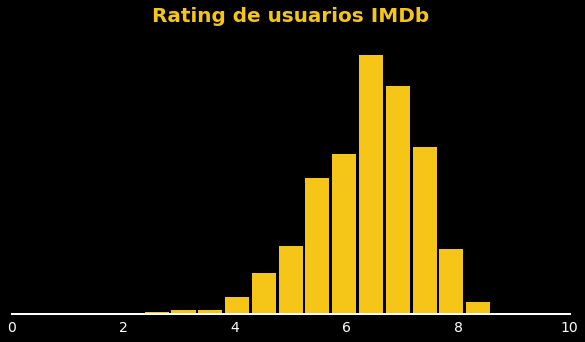

In [351]:
# libraries
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(movies.ratingImdb, color = '#f5c518', bins=15, edgecolor = "none", rwidth=0.9)

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.xaxis.grid(False) 

plt.title('Rating de usuarios IMDb', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=20)

plt.xticks(range(0,11,2), fontsize=14)

plt.savefig('images/hist_rating.png', dpi=300, bbox_inches='tight', transparent=True);

---
# `metascore`

In [13]:
movies.metascore.describe()

count    1553.00000
mean       55.25499
std        18.23188
min         1.00000
25%        42.00000
50%        56.00000
75%        69.00000
max       100.00000
Name: metascore, dtype: float64

In [14]:
# Preparing data
n_mvps = 10
mvps_metascore = movies[['spanishTitle', 'metascore']].sort_values(by='metascore', ascending=False)[:n_mvps]
mvps_metascore

,spanishTitle,metascore
19,Boyhood (Momentos de una vida),100.0
861,Moonlight,99.0
1481,Parásitos,96.0
767,Manchester frente al mar,96.0
1381,El irlandés,94.0
1019,Lady Bird,94.0
1508,Historia de un matrimonio,94.0
189,Mr. Turner,94.0
752,La ciudad de las estrellas (La La Land),94.0
407,Carol,94.0


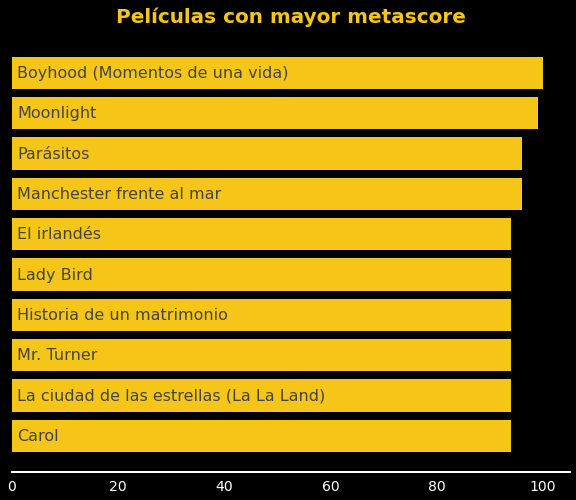

In [353]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

# Preparing data
n_mvps = 10
mvps_metascore = movies[['spanishTitle', 'metascore']].sort_values(by='metascore', ascending=False)[:n_mvps]

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(range(n_mvps+1,1,-1), mvps_metascore.metascore, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False)
ax.xaxis.set_ticks_position('none')

plt.xticks(fontsize=14)
plt.title('Películas con mayor metascore', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=15)


# Pintar nombre sobre las barras
for pos, name in tuple(zip(range(n_mvps+1,1,-1), mvps_metascore.spanishTitle)):
    ax.text(1, pos, name, va='center', ha='left', fontsize=16, fontweight='regular', color='#444');

plt.savefig('images/mvps_metascore.png', dpi=300, bbox_inches='tight', transparent=True);

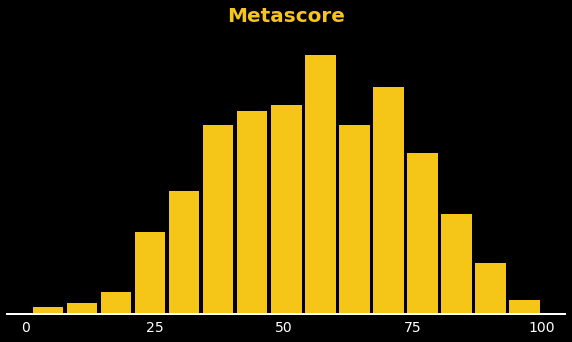

In [352]:
# libraries
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(movies.metascore, color = '#f5c518', bins=15, edgecolor = "none", rwidth=0.9)

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.xaxis.grid(False) 

plt.title('Metascore', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=20)

plt.xticks(range(0,101,25), fontsize=14)

plt.savefig('images/hist_metascore.png', dpi=300, bbox_inches='tight', transparent=True);

---
# `budget`

In [17]:
movies.budget.describe()

count    1.553000e+03
mean     3.306149e+07
std      4.902276e+07
min      2.259361e+00
25%      5.000000e+06
50%      1.349283e+07
75%      3.700000e+07
max      3.560000e+08
Name: budget, dtype: float64

<ipython-input-355-cdcd776951c8>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator



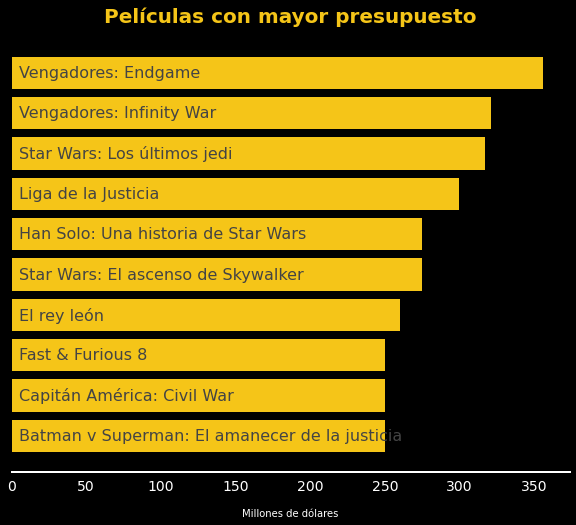

In [355]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

# Preparing data
n_mvps = 10
mvps_budget = movies[['spanishTitle', 'budget']].sort_values(by='budget', ascending=False)[:n_mvps]
mvps_budget

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(range(n_mvps+1,1,-1), mvps_budget.budget, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False) 

plt.title('Películas con mayor presupuesto', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=15)
plt.xlabel('Millones de dólares', labelpad=15)

fig.canvas.draw()
labels = [item.get_text().replace('.', '') for item in ax.get_xticklabels()]
labels[0]=0
labels = [int(item)*10 for item in labels]

ax.set_xticklabels(labels)
ax.xaxis.set_ticks_position('none')

plt.xticks(fontsize=14)

# Pintar nombre sobre las barras
for pos, name in tuple(zip(range(n_mvps+1,1,-1), mvps_budget.spanishTitle)):
    ax.text(5000000, pos, name, va='center', ha='left', fontsize=16, fontweight='regular', color='#444');

plt.savefig('images/mvps_budget.png', dpi=300, bbox_inches='tight', transparent=True);

<ipython-input-19-24150c06df24>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


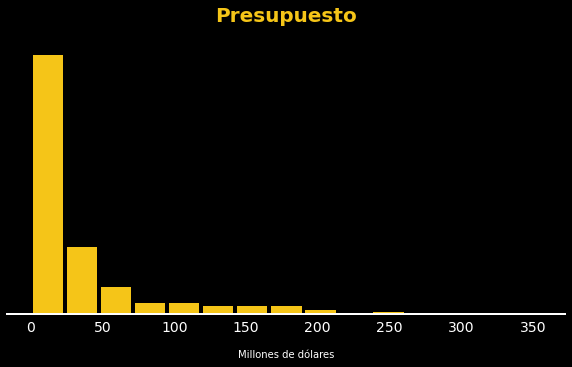

In [19]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(movies.budget, color = '#f5c518', bins=15, edgecolor = "none", rwidth=0.9)

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.xaxis.grid(False) 

plt.title('Presupuesto', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=20)
plt.xlabel('Millones de dólares', labelpad=15)

# Cambibar el texto de los xticks
fig.canvas.draw()
labels = [item.get_text().replace('.', '') for item in ax.get_xticklabels()]
labels[0]=0
labels[1]=0
labels = [int(item)*10 for item in labels]
ax.set_xticklabels(labels)

plt.xticks(fontsize=14)

plt.savefig('images/hist_budget.pdf', dpi=300, bbox_inches='tight', transparent=True);

### Pelis con mayor presupuesto por anno

In [344]:
mas_caras = pd.DataFrame()
for anno in range(2014, 2020):
    mas_caras= mas_caras.append(movies[['imdbId','spanishTitle', 'year', 'budget']][movies['year']==anno].sort_values(by='budget', ascending=False).iloc[0:1,:], ignore_index=False)
mas_caras

,imdbId,spanishTitle,year,budget
155,tt2310332,El hobbit: La batalla de los cinco ejércitos,2014.0,250000000.0
403,tt2395427,Vengadores: La era de Ultrón,2015.0,250000000.0
695,tt2975590,Batman v Superman: El amanecer de la justicia,2016.0,250000000.0
939,tt2527336,Star Wars: Los últimos jedi,2017.0,317000000.0
1187,tt4154756,Vengadores: Infinity War,2018.0,321000000.0
1419,tt4154796,Vengadores: Endgame,2019.0,356000000.0


---
# `grossWorld`

In [20]:
movies.grossWorld.describe()

count    1.553000e+03
mean     1.111871e+08
std      2.381673e+08
min      3.090000e+02
25%      1.472770e+06
50%      1.920651e+07
75%      1.003754e+08
max      2.797501e+09
Name: grossWorld, dtype: float64

In [21]:
# Preparing data
n_mvps = 10
mvps_grossWorld = movies[['spanishTitle', 'grossWorld']].sort_values(by='grossWorld', ascending=False)[:n_mvps]
mvps_grossWorld

,spanishTitle,grossWorld
1419,Vengadores: Endgame,2.797501e+09
413,Star Wars: El despertar de la Fuerza,2.069522e+09
1187,Vengadores: Infinity War,2.048360e+09
1455,El rey león,1.670728e+09
306,Jurassic World,1.670516e+09
439,Fast & Furious 7,1.515341e+09
1426,Frozen II,1.450027e+09
403,Vengadores: La era de Ultrón,1.402810e+09
1152,Black Panther,1.347598e+09
939,Star Wars: Los últimos jedi,1.332699e+09


<ipython-input-356-abbe5d533e9c>:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



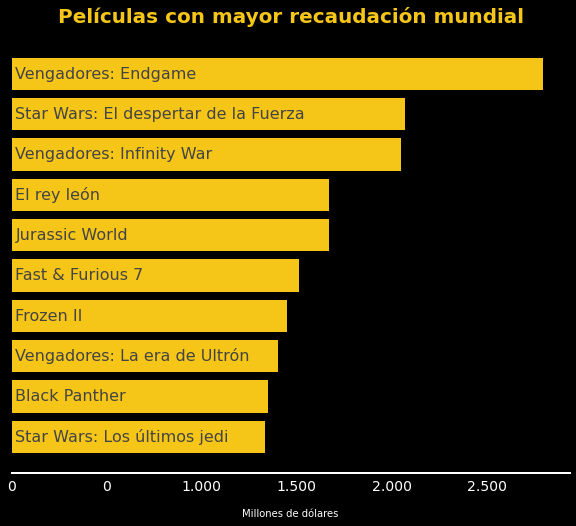

In [356]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

# Preparing data
n_mvps = 10
mvps_grossWorld = movies[['spanishTitle', 'grossWorld']].sort_values(by='grossWorld', ascending=False)[:n_mvps]

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(range(n_mvps+1,1,-1), mvps_grossWorld.grossWorld, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False) 

plt.title('Películas con mayor recaudación mundial', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=15)
plt.xlabel('Millones de dólares', labelpad=15)

# Cambibar el texto de los xticks
fig.canvas.draw()
labels = [item.get_text().replace('.', '') for item in ax.get_xticklabels()]
labels[0]=0
labels[1]=0
labels = [int(item)*100 for item in labels]
labels = ['{:,.2f}'.format(item).replace(".", "").replace(",", ".")[:-2] for item in labels]

ax.set_xticklabels(labels)
ax.xaxis.set_ticks_position('none')

plt.xticks(fontsize=14)

# Pintar nombre sobre las barras
for pos, name in tuple(zip(range(n_mvps+1,1,-1), mvps_grossWorld.spanishTitle)):
    ax.text(20000000, pos, name, va='center', ha='left', fontsize=16, fontweight='regular', color='#444');

plt.savefig('images/mvps_grossWorld.png', dpi=300, bbox_inches='tight', transparent=True);

<ipython-input-357-200c1dd00f14>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



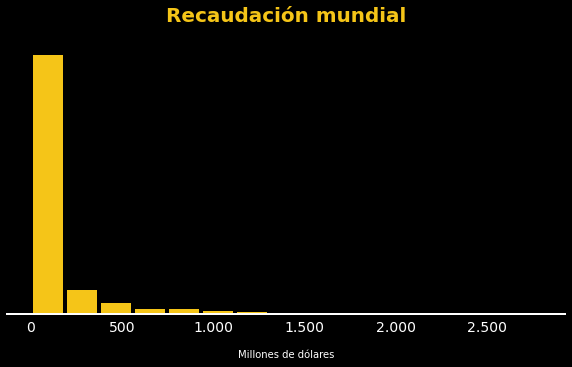

In [357]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(movies.grossWorld, color = '#f5c518', bins=15, edgecolor = "none", rwidth=0.9)

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.xaxis.grid(False) 

plt.title('Recaudación mundial', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=20)
plt.xlabel('Millones de dólares', labelpad=15)


# Cambibar el texto de los xticks
fig.canvas.draw()
labels = [item.get_text().replace('.', '') for item in ax.get_xticklabels()]
labels[0]=0
labels[1]=0
labels = [int(item)*100 for item in labels]
labels = ['{:,.2f}'.format(item).replace(".", "").replace(",", ".")[:-2] for item in labels]
ax.set_xticklabels(labels)

plt.xticks(fontsize=14)

plt.savefig('images/hist_grossWorld.png', dpi=300, bbox_inches='tight', transparent=True);

---
# `profit`

In [24]:
movies.profit.describe()

count    1.553000e+03
mean     7.812559e+07
std      2.004920e+08
min     -1.580311e+08
25%     -3.159592e+06
50%      4.309313e+06
75%      6.392939e+07
max      2.441501e+09
Name: profit, dtype: float64

In [25]:
# Preparing data
n_mvps = 10
mvps_profit = movies[['spanishTitle', 'profit']].sort_values(by='profit', ascending=False)[:n_mvps]
mvps_profit

,spanishTitle,profit
1419,Vengadores: Endgame,2.441501e+09
413,Star Wars: El despertar de la Fuerza,1.824522e+09
1187,Vengadores: Infinity War,1.727360e+09
306,Jurassic World,1.520516e+09
1455,El rey león,1.410728e+09
439,Fast & Furious 7,1.325341e+09
1426,Frozen II,1.300027e+09
403,Vengadores: La era de Ultrón,1.152810e+09
1152,Black Panther,1.147598e+09
1212,Jurassic World: El reino caído,1.140466e+09


<ipython-input-358-36c3a5d89866>:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



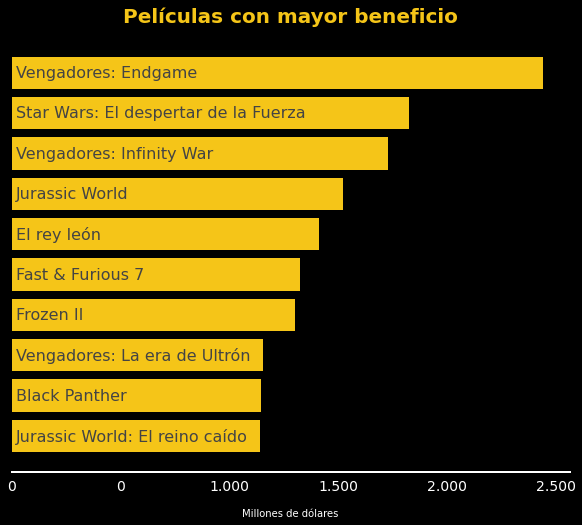

In [358]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

# Preparing data
n_mvps = 10
mvps_profit = movies[['spanishTitle', 'profit']].sort_values(by='profit', ascending=False)[:n_mvps]

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(range(n_mvps+1,1,-1), mvps_profit.profit, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False) 

plt.title('Películas con mayor beneficio', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=15)
plt.xlabel('Millones de dólares', labelpad=15)

# Cambibar el texto de los xticks
fig.canvas.draw()
labels = [item.get_text().replace('.', '') for item in ax.get_xticklabels()]
labels[0]=0
labels[1]=0
labels = [int(item)*100 for item in labels]
labels = ['{:,.2f}'.format(item).replace(".", "").replace(",", ".")[:-2] for item in labels]

ax.set_xticklabels(labels)
ax.xaxis.set_ticks_position('none')

plt.xticks(fontsize=14)

# Pintar nombre sobre las barras
for pos, name in tuple(zip(range(n_mvps+1,1,-1), mvps_profit.spanishTitle)):
    ax.text(20000000, pos, name, va='center', ha='left', fontsize=16, fontweight='regular', color='#444');

plt.savefig('images/mvps_profit.png', dpi=300, bbox_inches='tight', transparent=True);

<ipython-input-359-0e39fc8ff3ac>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



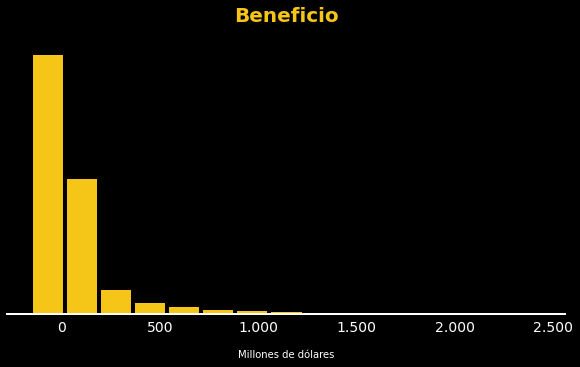

In [359]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(movies.profit, color = '#f5c518', bins=15, edgecolor = "none", rwidth=0.9)

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.xaxis.grid(False) 

plt.title('Beneficio', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=20)
plt.xlabel('Millones de dólares', labelpad=15)


# Cambibar el texto de los xticks
fig.canvas.draw()
labels = [item.get_text().replace('.', '') for item in ax.get_xticklabels()]
labels[0]=0
labels[1]=0
labels = [int(item)*100 for item in labels]
labels = ['{:,.2f}'.format(item).replace(".", "").replace(",", ".")[:-2] for item in labels]
ax.set_xticklabels(labels)

plt.xticks(fontsize=14)

plt.savefig('images/hist_profit.png', dpi=300, bbox_inches='tight', transparent=True);

In [28]:
# Preparing data
n_mvps = 10
mvps_budget = movies[['spanishTitle', 'budget']].sort_values(by='budget', ascending=False)[:n_mvps]
mvps_budget

,spanishTitle,budget
1419,Vengadores: Endgame,356000000.0
1187,Vengadores: Infinity War,321000000.0
939,Star Wars: Los últimos jedi,317000000.0
892,Liga de la Justicia,300000000.0
1178,Han Solo: Una historia de Star Wars,275000000.0
1401,Star Wars: El ascenso de Skywalker,275000000.0
1455,El rey león,260000000.0
1005,Fast & Furious 8,250000000.0
726,Capitán América: Civil War,250000000.0
695,Batman v Superman: El amanecer de la justicia,250000000.0


---
# `roi`

La variable `roi` tiene un par de valoreserróneos  que distorsionan completamente las ralaciones de las variables. Se trata de películas para las que han introducido un presupuesto de 2€ y 11€, por ejemplo. Así, las películas con un ROI superior a 30 no las tendremos en cuenta para valorar el desempeño del ROI. 

In [29]:
movies[movies.roi>=30]

,imdbId,year,spanishTitle,originalTitle,englishTitle,ratingImdb,numVotes,metascore,isAdult,certificate,...,stars,countries,companies,awards,budget,grossUsCanada,openingUsCanada,grossWorld,profit,roi
136,tt2235779,2014.0,El estigma del mal,The Quiet Ones,The Quiet Ones,5.1,19552.0,41.0,0.0,PG-13,...,"Craig Rosenberg,Oren Moverman,John Pogue","United Kingdom,United States","Exclusive Media Group,Hammer Films,Traveling P...",Awards\n7 nominations,2.000000e+05,8509867.0,3880053.0,17835162.0,1.763516e+07,88.175810
195,tt2528814,2014.0,God's Not Dead,God's Not Dead,God's Not Dead,4.7,41155.0,16.0,0.0,PG,...,"Hunter Dennis,Chuck Konzelman,Cary Solomon",United States,"Pure Flix Productions,Believe Entertainment (I...",Awards\n1 win,2.000000e+06,60755732.0,9217013.0,64676349.0,6.267635e+07,31.338175
281,tt3186946,2014.0,Cuestión de actitud. Xenia,Xenia,Xenia,6.7,3767.0,62.0,0.0,16,...,"Panos H. Koutras,Panagiotis Evangelidis,Frédér...","Greece,France,Belgium","100% Synthetic Films,Wrong Men,MPM Film",Awards\n10 wins & 14 nominations,1.992752e+03,3181.0,358.0,139186.0,1.371932e+05,68.846133
290,tt3322940,2014.0,Annabelle,Annabelle,Annabelle,5.4,146791.0,37.0,0.0,16,...,Gary Dauberman,United States,"New Line Cinema,RatPac-Dune Entertainment,Atom...",Awards\n3 wins & 7 nominations,6.500000e+06,84273813.0,37134255.0,257579282.0,2.510793e+08,38.627582
299,tt3713166,2014.0,Eliminado,Unfriended,Unfriended,5.5,70879.0,59.0,0.0,16,...,Nelson Greaves,"United States,Russia","Bazelevs Production,Blumhouse Productions",Awards\n3 wins & 6 nominations,1.000000e+06,32482090.0,15845115.0,62882090.0,6.188209e+07,61.882090
393,tt2309260,2015.0,La horca,The Gallows,The Gallows,4.3,19547.0,30.0,0.0,R,...,"Chris Lofing,Travis Cluff",United States,"New Line Cinema,Blumhouse Productions,Entertai...",Awards\n1 nomination,1.000000e+05,22764410.0,9808463.0,42964410.0,4.286441e+07,428.644100
873,tt5311514,2016.0,Your Name.,Kimi no na wa.,Your Name.,8.4,214454.0,79.0,0.0,A,...,"Makoto Shinkai,Clark Cheng",Japan,"Amuse,CoMix Wave Films,East Japan Marketing & ...",Awards\r\n16 wins & 26 nominations,3.400957e+06,5017246.0,1813781.0,358180115.0,3.547792e+08,104.317442
1024,tt5052448,2017.0,Déjame salir,Get Out,Get Out,7.7,515738.0,85.0,0.0,16,...,Jordan Peele,"United States,Japan","Universal Pictures,Blumhouse Productions,QC En...",Won 1 Oscar\n149 wins & 206 nominations total,4.500000e+06,176040665.0,33377060.0,255589157.0,2.510892e+08,55.797590
1061,tt5642124,2017.0,Amante por un día,L'amant d'un jour,Lover for a Day,6.7,2008.0,69.0,0.0,16,...,"Jean-Claude Carrière,Caroline Deruas-Garrel,Ph...",France,"SBS Productions,Arte France Cinéma,ARTE",Awards\n2 wins & 3 nominations,2.259361e+00,NaN,NaN,383872.0,3.838697e+05,169901.898816
1124,tt7914416,2017.0,One cut of the dead,Kamera wo tomeruna!,One Cut of the Dead,7.7,19568.0,86.0,0.0,Not Rated,...,"""Shinichirô Ueda"",Ryoichi Wada",Japan,"ENBU Seminar,Panpokopina",Awards\n27 wins & 20 nominations,2.674604e+04,52406.0,6360.0,27590180.0,2.756343e+07,1030.561340


In [31]:
# Inspeccionemos las 10 películas con mayor ROI

n_mvps = 10
mvps_roi = movies[(movies.roi<30)&(movies.budget>1000)][['imdbId', 'spanishTitle', 'budget', 'roi']].sort_values(by='roi', ascending=False)[:n_mvps]
mvps_roi

,imdbId,spanishTitle,budget,roi
860,tt4972582,Múltiple,9.000000e+06,29.939380
846,tt4786282,Nunca apagues la luz,4.900000e+06,29.381395
1331,tt7362036,Wo bu shi yao shen,1.500000e+07,29.078893
580,tt4613272,Kaili Blues,3.211567e+04,28.120860
1122,tt7131870,Wolf Warrior 2,3.010000e+07,27.914466
1297,tt6772950,Verdad o reto,3.500000e+06,26.237346
1038,tt5308322,Feliz día de tu muerte,4.800000e+06,25.141514
203,tt2582846,Bajo la misma estrella,1.200000e+07,24.597236
1141,tt1502407,La noche de Halloween,1.000000e+07,24.561494
536,tt3832914,Un lugar donde rezar,3.000000e+06,23.418755


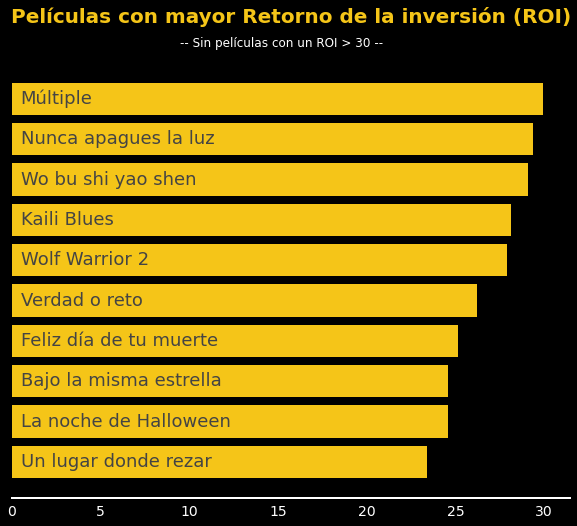

In [360]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

# Preparing data
n_mvps = 10
mvps_roi = movies[(movies.roi<30)][['spanishTitle', 'roi']].sort_values(by='roi', ascending=False)[:n_mvps]
mvps_roi

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(range(n_mvps+1,1,-1), mvps_roi.roi, color = '#f5c518', edgecolor = "none")

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False)
ax.xaxis.set_ticks_position('none')

plt.title('Películas con mayor Retorno de la inversión (ROI)', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=40)
plt.suptitle('-- Sin películas con un ROI > 30 --', y=.925)

plt.xticks(fontsize=14)

# Pintar nombre sobre las barras
for pos, name in tuple(zip(range(n_mvps+1,1,-1), mvps_roi.spanishTitle)):
    ax.text(.5, pos, name, va='center', ha='left', fontsize=18, fontweight='regular', color='#444');

plt.savefig('images/mvps_roi.png', dpi=300, bbox_inches='tight', transparent=True);

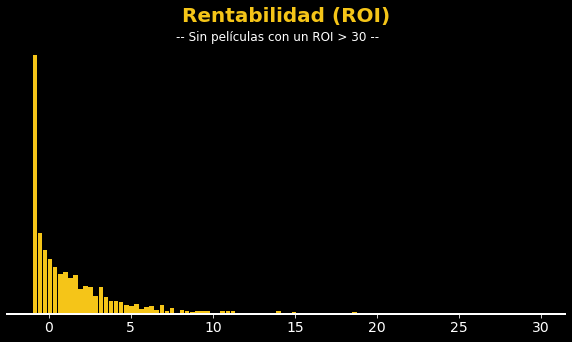

In [361]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(movies.roi[movies.roi<30], color = '#f5c518', bins=100, edgecolor = "none", rwidth=0.9)

ax.set_yticks([])
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(False) 

plt.xticks(fontsize=14)

plt.title('Rentabilidad (ROI)', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=20)
plt.suptitle('-- Sin películas con un ROI > 30 --', y=.91)

plt.savefig('images/hist_roi.png', dpi=300, bbox_inches='tight', transparent=True);

---
# `genres`
### Creación de la columna `primaryGenre` con el género principal de la cada película

In [34]:
def first_elem_csv(csv):
    if str(csv) == 'nan':
        return np.nan
    else:
        return csv.split(',')[0]

### Agrupación de los géneros en 8 categorías

In [35]:
# Seleccionar el primer género
movies['primaryGenre'] = movies['genres'].apply(first_elem_csv)
movies['primaryGenre']

0          Action
1           Drama
2          Action
3          Comedy
4          Action
          ...    
1548       Comedy
1549    Animation
1550        Drama
1551    Biography
1552        Drama
Name: primaryGenre, Length: 1553, dtype: object

In [37]:
### Agrupación de los géneros en 6 categorías

def grouppingGenres(genre):
    if (genre == 'Biography') | (genre == 'Documentary'):
        return 'Bio-Documentary'
    elif genre == 'Crime':
        return 'Thriller'
    elif genre == 'Fantasy':
        return 'Adventure'
    elif genre == 'Family':
        return 'Adventure'
    else:
        return genre

In [38]:
movies['primaryGenre'] = movies['primaryGenre'].apply(grouppingGenres)
movies['primaryGenre'].unique()

array(['Action', 'Drama', 'Comedy', 'Bio-Documentary', 'Adventure',
       'Horror', 'Thriller', 'Animation', 'Mystery', 'Romance', 'Adult'],
      dtype=object)

In [162]:
# Crear la tabla adecuada para el bar stick de plotly

genres_by_year = movies.groupby(['year','primaryGenre'])[['primaryGenre']].count().unstack().T
genres_by_year.index = genres_by_year.index.droplevel()
genres_by_year.columns = genres_by_year.columns.astype(int)
genres_by_year

year,2014,2015,2016,2017,2018,2019
primaryGenre,,,,,,
Action,86.0,73.0,91.0,55.0,71.0,57.0
Adult,NaN,1.0,NaN,NaN,NaN,NaN
Adventure,23.0,25.0,20.0,23.0,22.0,23.0
Animation,2.0,5.0,4.0,2.0,4.0,3.0
Bio-Documentary,36.0,47.0,44.0,39.0,34.0,18.0
Comedy,59.0,47.0,54.0,37.0,38.0,32.0
Drama,66.0,66.0,52.0,60.0,46.0,35.0
Horror,13.0,11.0,14.0,9.0,9.0,10.0
Mystery,1.0,NaN,NaN,NaN,NaN,NaN


In [163]:
# Ordenar el df por la nueva columna total

genres_by_year['TOTAL'] = genres_by_year.sum(axis=1)
genres_by_year.sort_values(by=['TOTAL'], inplace=True, ascending=False)
genres_by_year = genres_by_year[genres_by_year['TOTAL']>1]
genres_by_year

year,2014,2015,2016,2017,2018,2019,TOTAL
primaryGenre,,,,,,,
Action,86.0,73.0,91.0,55.0,71.0,57.0,433.0
Drama,66.0,66.0,52.0,60.0,46.0,35.0,325.0
Comedy,59.0,47.0,54.0,37.0,38.0,32.0,267.0
Bio-Documentary,36.0,47.0,44.0,39.0,34.0,18.0,218.0
Adventure,23.0,25.0,20.0,23.0,22.0,23.0,136.0
Thriller,19.0,10.0,17.0,13.0,17.0,9.0,85.0
Horror,13.0,11.0,14.0,9.0,9.0,10.0,66.0
Animation,2.0,5.0,4.0,2.0,4.0,3.0,20.0


In [41]:
genres_by_year.index

Index(['Action', 'Drama', 'Comedy', 'Bio-Documentary', 'Adventure', 'Thriller',
       'Horror', 'Animation'],
      dtype='object', name='primaryGenre')

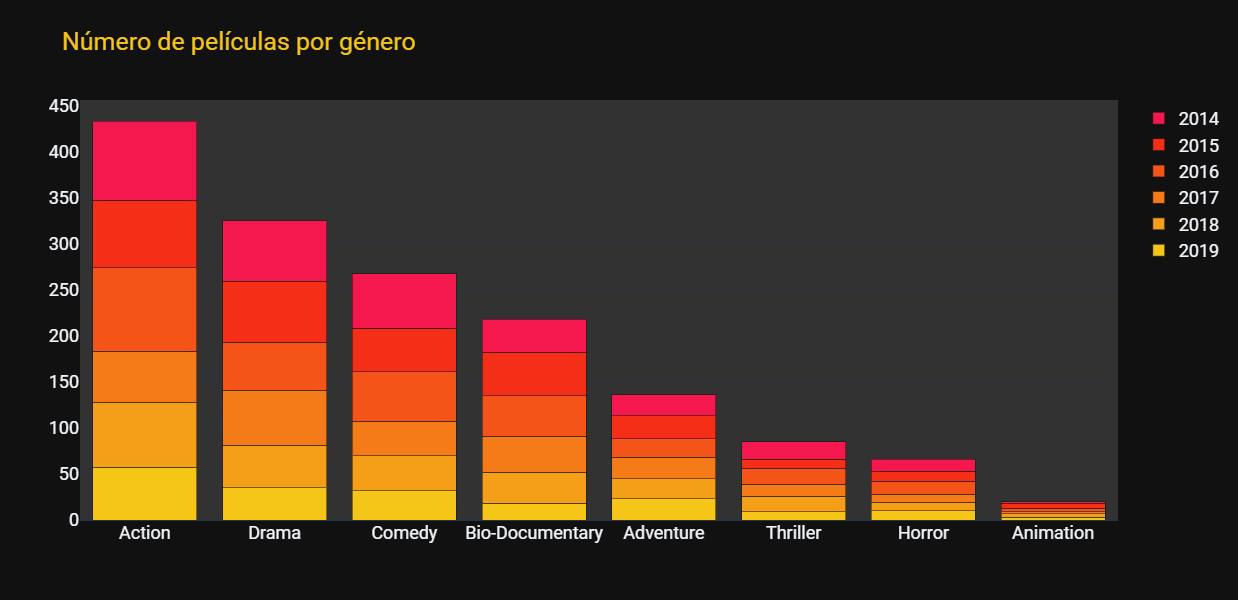

In [166]:
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from plotly import tools
import matplotlib.pyplot as plt


# Preparing data
x = genres_by_year.index

trace1 = {
    'x': x,
    'y': genres_by_year[2014],
    'name': '2014',
    'type': 'bar',
    'marker': {'color': '#F5184F'}
}


trace2 = {
    'x': x,
    'y': genres_by_year[2015],
    'name': '2015',
    'type': 'bar',
    'marker': {'color': '#F52E18'}
}


trace3 = {
    'x': x,
    'y': genres_by_year[2016],
    'name': '2016',
    'type': 'bar',
    'marker': {'color': '#F55418'}
}

trace4 = {
    'x': x,
    'y': genres_by_year[2017],
    'name': '2017',
    'type': 'bar',
    'marker': {'color': '#F57A18'}
    
}

trace5 = {
    'x': x,
    'y': genres_by_year[2018],
    'name': '2018',
    'type': 'bar',
    'marker': {'color': '#F59F18'}
}

trace6 = {
    'x': x,
    'y': genres_by_year[2019],
    'name': '2019',
    'type': 'bar',
    'marker': {'color': '#F5C518'}   ## Colores 2019-2014: '#F5184F', '#F52E18', '#F55418', '#F57A18', '#F59F18', '#F5C518'
}


data = [trace6, trace5, trace4, trace3, trace2, trace1]


layout = {'xaxis': {'title': ''},
          'font': {'family':"Roboto", 'size':18},
          'title_font_family': 'Roboto',
          'title_font_color':'#F5C518',
          'height': 600,
          'barmode': 'stack',
          'title': 'Número de películas por género',
          'template' : "plotly_dark",
          'plot_bgcolor':'rgba(50,50,50,1)'
         }


fig = go.Figure(data = data, layout = layout)
iplot(fig)

# `countries`

In [212]:
# Selección del primer país de la lista de países y creación de tabla counts de países
movies['primaryCountry'] = movies['countries'].apply(first_elem_csv)
countries_count = movies.groupby('primaryCountry')[['primaryCountry']].count()
countries_count.rename(columns={'primaryCountry': 'countryCounts'}, inplace=True)
countries_count.reset_index(inplace=True)
countries_count

,primaryCountry,countryCounts
0,Argentina,4
1,Australia,14
2,Austria,3
3,Bahamas,1
4,Belgium,12
5,Brazil,7
6,Canada,56
7,Chile,2
8,China,47
9,Colombia,1


In [201]:
'''
Finalmente esto es innesario porque se puede localizar por el nombre del país

# Lectura de csv externo con código iso de países de 3 caracteres
countries_iso = pd.read_csv('../data/wikipedia-iso-country-codes.csv')
# Merge de tabla counts con código iso
countries= pd.merge(countries_count, countries_iso[['English short name lower case', 'Alpha-3 code']], left_on='primaryCountry', right_on='English short name lower case')
countries= countries[['primaryCountry', 'Alpha-3 code', 'countryCounts']]
countries.rename(columns={'Alpha-3 code': 'codeCountry'}, inplace=True)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   English short name lower case  246 non-null    object
 1   Alpha-2 code                   245 non-null    object
 2   Alpha-3 code                   246 non-null    object
 3   Numeric code                   246 non-null    int64 
 4   ISO 3166-2                     246 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.7+ KB


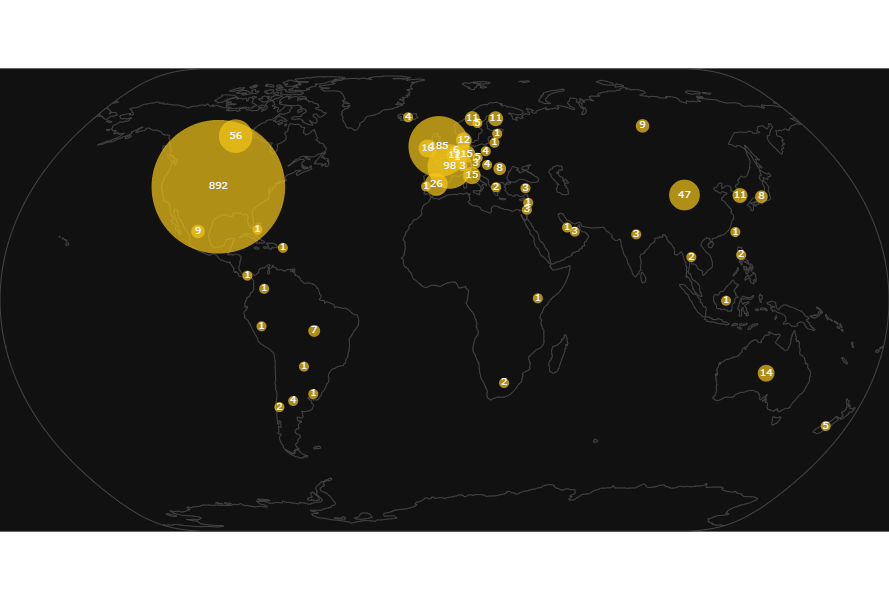

In [376]:
import plotly.express as px

fig = px.scatter_geo(countries_count, locations="primaryCountry",
                     hover_name="primaryCountry", size="countryCounts", text = 'countryCounts',
                     projection="natural earth", locationmode = 'country names',
                     width=1000, height=600, template="plotly_dark", range_color=[20,80], 
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                 plot_bgcolor='rgba(0,0,0,0)',
                 paper_bgcolor='rgba(0,0,0,0)',)


fig.update_traces(marker = dict(color = '#f5c518',
                                line_width=0,
                                sizeref=.1,
                               sizemin=5),
                  mode = 'markers+text',
                  textfont = dict(size=10)
                 )
                     
fig.show()

---
# Correlaciones de valoraciones y recaudación

In [43]:
method = 'pearson'

print('Corr Método:', method)

movies[movies.roi<30][['ratingImdb', 'metascore', 'budget', 'grossWorld', 'profit', 'roi']].corr(method = method)

Corr Método: pearson


,ratingImdb,metascore,budget,grossWorld,profit,roi
ratingImdb,1.000000,0.716372,0.147635,0.231487,0.238991,0.190921
metascore,0.716372,1.000000,0.017639,0.120033,0.138320,0.139529
budget,0.147635,0.017639,1.000000,0.812222,0.720773,0.100520
grossWorld,0.231487,0.120033,0.812222,1.000000,0.989788,0.376580
profit,0.238991,0.138320,0.720773,0.989788,1.000000,0.422913
roi,0.190921,0.139529,0.100520,0.376580,0.422913,1.000000


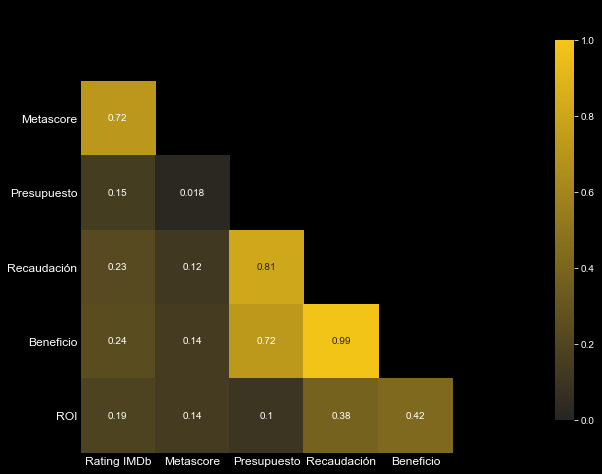

In [362]:
import seaborn as sns
import numpy as np
plt.style.use('dark_background')

# Matriz de correlación
corr = movies[movies.roi<30][['ratingImdb', 'metascore', 'budget', 'grossWorld', 'profit', 'roi']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#cmap = sns.color_palette("flare", as_cmap=True)
cmap = sns.dark_palette('#f5c518', reverse=False, as_cmap=True)

f, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(corr, cmap=cmap, annot=True, mask=mask,
                 vmin=0, vmax=1, square=True,
                 yticklabels = ['', 'Metascore', 'Presupuesto', 'Recaudación', 'Beneficio', 'ROI'],
                 xticklabels = ['Rating IMDb', 'Metascore', 'Presupuesto', 'Recaudación', 'Beneficio', ''],
                 cbar_kws = {'shrink':.7}
           )
ax.tick_params(axis='both', rotation=0, size=0)
sns.set_theme(palette = 'dark', font='Roboto')       #, font_scale=1)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('images/seaborn-corr.png', dpi=300, bbox_inches='tight', transparent=True);

## Matriz de 2x6 variables

In [43]:
corr_6x6 = movies[movies.roi<30][['ratingImdb', 'metascore', 'budget', 'grossWorld', 'profit', 'roi']].corr()
corr_2x6 = corr_6x6.loc['ratingImdb': 'metascore', 'budget':'roi']

In [369]:
movies['primaryGenre']

0                Action
1                 Drama
2                Action
3                Comedy
4                Action
             ...       
1548             Comedy
1549          Animation
1550              Drama
1551    Bio-Documentary
1552              Drama
Name: primaryGenre, Length: 1553, dtype: object

In [373]:
accion = movies[(movies.roi<30) & (movies.primaryGenre=='Action')][['ratingImdb', 'metascore', 'budget', 'grossWorld', 'profit', 'roi']].corr()
accion = accion.loc['ratingImdb': 'metascore', 'budget':'roi']
accion

,budget,grossWorld,profit,roi
ratingImdb,0.383954,0.441179,0.431259,0.390825
metascore,0.277834,0.363195,0.363735,0.309520


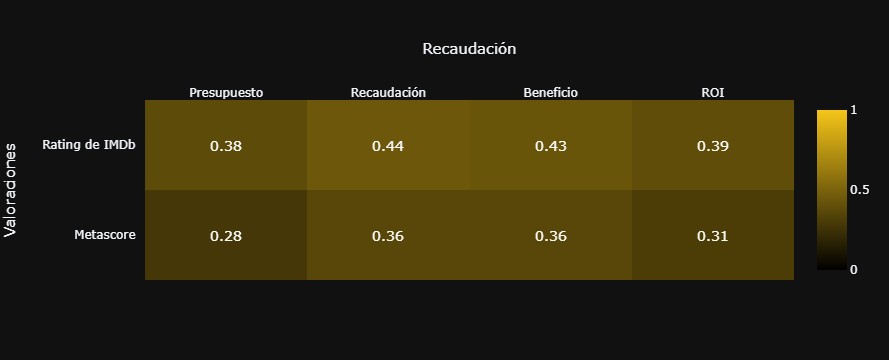

In [374]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(accion.round(2).to_numpy().tolist(),
                x=['Presupuesto', 'Recaudación', 'Beneficio', 'ROI'],
                y=['Rating de IMDb', 'Metascore'],
                colorscale=[[0, "black"], [1, '#f5c518']],
                font_colors = ['white'],
                showscale=True,
                zmin=0, zmax=1,
               )

fig.update_layout(width=600, height=350,  template="plotly_dark",
                 )

fig.update_xaxes(
    title_text = "Recaudación",
    title_font = {"size": 15},
    title_standoff = 20,
)

fig.update_yaxes(
    title_text = "Valoraciones",
    title_font = {"size": 15},
    title_standoff = 20,
    autorange="reversed"
)    

# Make text size bigger
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 14
    
fig.show()

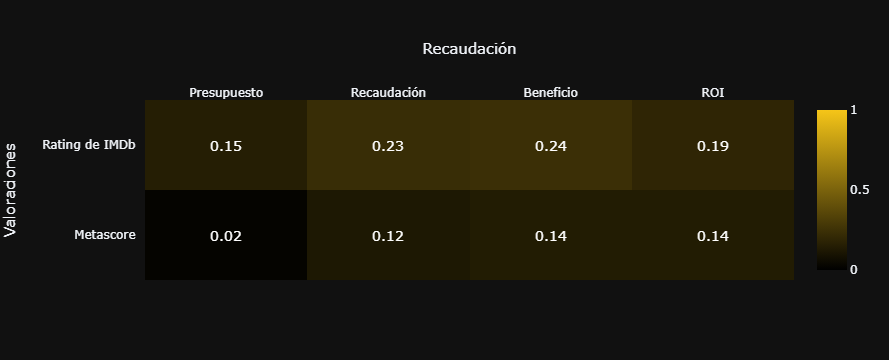

In [365]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_2x6.round(2).to_numpy().tolist(),
                x=['Presupuesto', 'Recaudación', 'Beneficio', 'ROI'],
                y=['Rating de IMDb', 'Metascore'],
                colorscale=[[0, "black"], [1, '#f5c518']],
                font_colors = ['white'],
                showscale=True,
                zmin=0, zmax=1,
               )

fig.update_layout(width=600, height=350,  template="plotly_dark",
                 )

fig.update_xaxes(
    title_text = "Recaudación",
    title_font = {"size": 15},
    title_standoff = 20,
)

fig.update_yaxes(
    title_text = "Valoraciones",
    title_font = {"size": 15},
    title_standoff = 20,
    autorange="reversed"
)    

# Make text size bigger
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 14
    
fig.show()

In [3]:
def first_elem_csv(csv):
    if str(csv) == 'nan':
        return np.nan
    else:
        return csv.split(',')[0]

movies['primaryGenre'] = movies['genres'].apply(first_elem_csv)


### Agrupación de los géneros en 6 categorías

def grouppingGenres(genre):
    if (genre == 'Biography') | (genre == 'Documentary'):
        return 'Bio-Documentary'
    elif genre == 'Crime':
        return 'Thriller'
    elif genre == 'Fantasy':
        return 'Adventure'
    elif genre == 'Family':
        return 'Adventure'
    else:
        return genre
    
movies['primaryGenre'] = movies['primaryGenre'].apply(grouppingGenres)

### Matriz de correlación tipo para un Género: `Action`

In [151]:
movies[(movies.roi<30) & (movies.primaryGenre=='Action')][['ratingImdb', 'metascore', 'budget', 'grossWorld', 'profit', 'roi']].corr().loc['ratingImdb': 'metascore', 'budget':'roi']

,budget,grossWorld,profit,roi
ratingImdb,0.383954,0.441179,0.431259,0.390825
metascore,0.277834,0.363195,0.363735,0.309520


### Valoraciones por género

In [17]:
# ratingIMDb

movies['primaryGenre'] = movies['primaryGenre'].apply(grouppingGenres)
rating_genres = movies.groupby('primaryGenre').ratingImdb.describe().T[['Action', 'Adventure', 'Animation', 'Bio-Documentary',
       'Comedy', 'Drama', 'Horror', 'Thriller']]

primaryGenre,Action,Adventure,Animation,Bio-Documentary,Comedy,Drama,Horror,Thriller
count,433.000000,136.000000,20.000000,218.000000,267.000000,325.000000,66.000000,85.000000
mean,6.195150,6.493382,6.915000,6.865138,6.251311,6.449846,5.563636,6.302353
std,0.974845,0.940623,0.926382,0.685582,0.938418,0.899850,0.947001,0.880473
min,2.600000,3.300000,4.300000,4.600000,1.400000,2.100000,3.200000,4.000000
25%,5.600000,6.000000,6.250000,6.500000,5.800000,6.000000,5.000000,5.800000
50%,6.200000,6.550000,7.100000,6.900000,6.300000,6.600000,5.450000,6.300000
75%,6.900000,7.200000,7.525000,7.300000,6.800000,7.100000,6.200000,6.900000
max,8.400000,8.600000,8.400000,8.600000,8.600000,8.500000,7.700000,8.400000


In [14]:
# metascore

movies['primaryGenre'] = movies['primaryGenre'].apply(grouppingGenres)
movies.groupby('primaryGenre').metascore.describe().T[['Action', 'Adventure', 'Animation', 'Bio-Documentary',
       'Comedy', 'Drama', 'Horror', 'Thriller']]

primaryGenre,Action,Adventure,Animation,Bio-Documentary,Comedy,Drama,Horror,Thriller
count,433.000000,136.000000,20.000000,218.000000,267.000000,325.000000,66.000000,85.000000
mean,49.960739,58.647059,65.300000,60.435780,55.318352,58.775385,47.954545,53.329412
std,16.950113,16.166050,14.988065,15.958414,19.164105,19.549921,16.476960,18.004225
min,3.000000,12.000000,39.000000,1.000000,1.000000,1.000000,24.000000,16.000000
25%,38.000000,48.750000,51.750000,51.250000,40.000000,44.000000,34.250000,41.000000
50%,50.000000,59.000000,64.500000,62.500000,55.000000,61.000000,45.000000,55.000000
75%,63.000000,70.000000,77.250000,71.000000,70.000000,74.000000,58.500000,68.000000
max,94.000000,94.000000,88.000000,94.000000,96.000000,100.000000,85.000000,91.000000


### Matriz de correlación tipo para un País: `Estados Unidos`

In [153]:
movies['primaryCountry'] = movies['countries'].apply(first_elem_csv)

In [154]:
movies.primaryCountry.unique()

array(['United States', 'United Kingdom', 'Czech Republic', 'Bahamas',
       'Hong Kong', 'France', 'Brazil', 'Canada', 'Qatar', 'Thailand',
       'Spain', 'Belgium', 'Ireland', 'Finland', 'Turkey', 'Switzerland',
       'New Zealand', 'Germany', 'Indonesia', 'Australia', 'Argentina',
       'China', 'Kenya', 'Norway', 'Denmark', 'Hungary', 'Mexico',
       'Italy', 'Greece', 'Russia', 'Austria', 'Portugal', 'Israel',
       'Iceland', 'Netherlands', 'South Africa', 'Chile', 'South Korea',
       'India', 'Taiwan', 'United Arab Emirates', 'Poland', 'Colombia',
       'Japan', 'Romania', 'Sweden', 'Panama', 'Peru', 'Philippines',
       'Malta', 'Estonia', 'Lithuania', 'Luxembourg', 'Puerto Rico',
       'Paraguay', 'Lebanon', 'Uruguay'], dtype=object)

In [159]:
movies.groupby('primaryCountry').primaryCountry.count().sort_values(ascending=False)

primaryCountry
United States           892
United Kingdom          185
France                   98
Canada                   56
China                    47
Spain                    26
Ireland                  16
Italy                    15
Germany                  15
Australia                14
Belgium                  12
Denmark                  12
Finland                  11
South Korea              11
Norway                   11
Mexico                    9
Russia                    9
Hong Kong                 9
Romania                   8
Japan                     8
Brazil                    7
Netherlands               6
New Zealand               5
Czech Republic            5
Sweden                    5
Poland                    4
Argentina                 4
Iceland                   4
Hungary                   4
Switzerland               3
Israel                    3
India                     3
United Arab Emirates      3
Austria                   3
Turkey                    3
Thail

In [160]:
movies[(movies.roi<30) & (movies.primaryCountry=='United States')][['ratingImdb', 'metascore', 'budget', 'grossWorld', 'profit', 'roi']].corr().loc['ratingImdb': 'metascore', 'budget':'roi']

,budget,grossWorld,profit,roi
ratingImdb,0.248757,0.306110,0.303560,0.181568
metascore,0.147388,0.227432,0.234344,0.195480


## Matriz de 6x6 variables

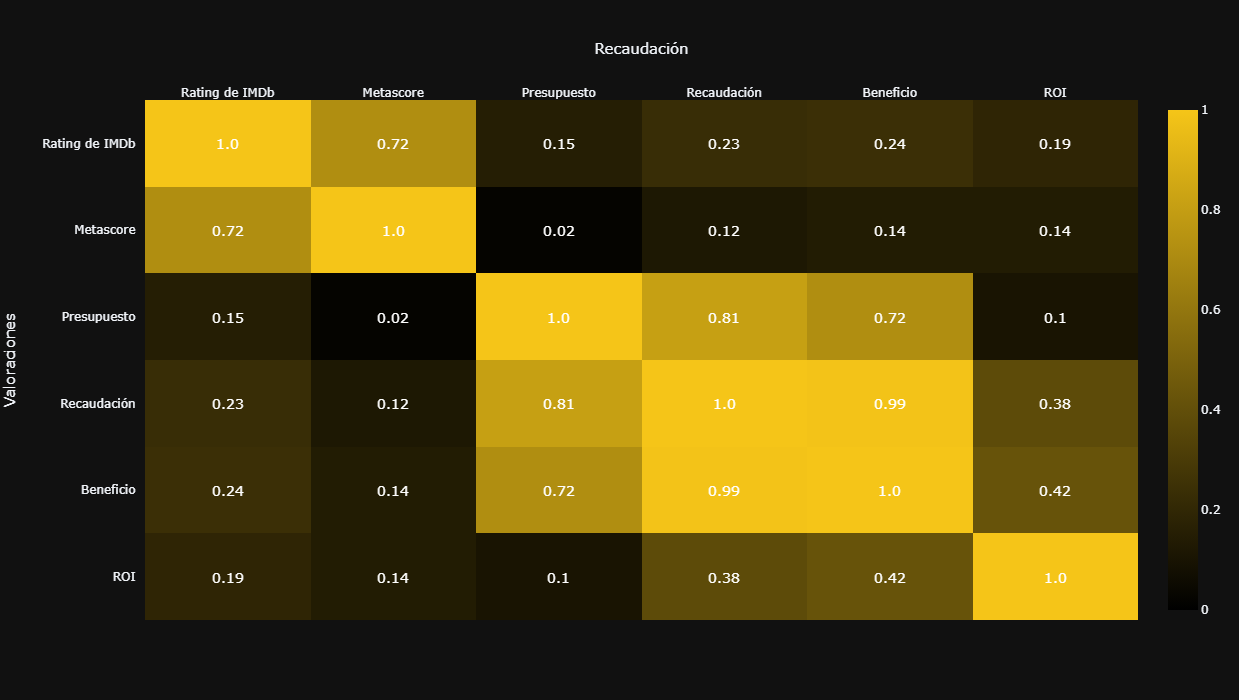

In [66]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_6x6.round(2).to_numpy().tolist(),
                x=['Rating de IMDb', 'Metascore', 'Presupuesto', 'Recaudación', 'Beneficio', 'ROI'],
                y=['Rating de IMDb', 'Metascore', 'Presupuesto', 'Recaudación', 'Beneficio', 'ROI'],
                colorscale=[[0, "black"], [1, '#f5c518']],
                font_colors = ['white'],
                showscale=True,
                zmin=0, zmax=1,
               )

fig.update_layout(width=800, height=700,  template="plotly_dark"
                 )

fig.update_xaxes(
    title_text = "Recaudación",
    title_font = {"size": 15},
    title_standoff = 20,
)

fig.update_yaxes(
    title_text = "Valoraciones",
    title_font = {"size": 15},
    title_standoff = 20,
    autorange="reversed"
)    

# Make text size bigger
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 14
    
fig.show()

---
# Correlación de Rating y Metascore

In [46]:
movies['year'] = movies['year'].astype(int).astype('category')

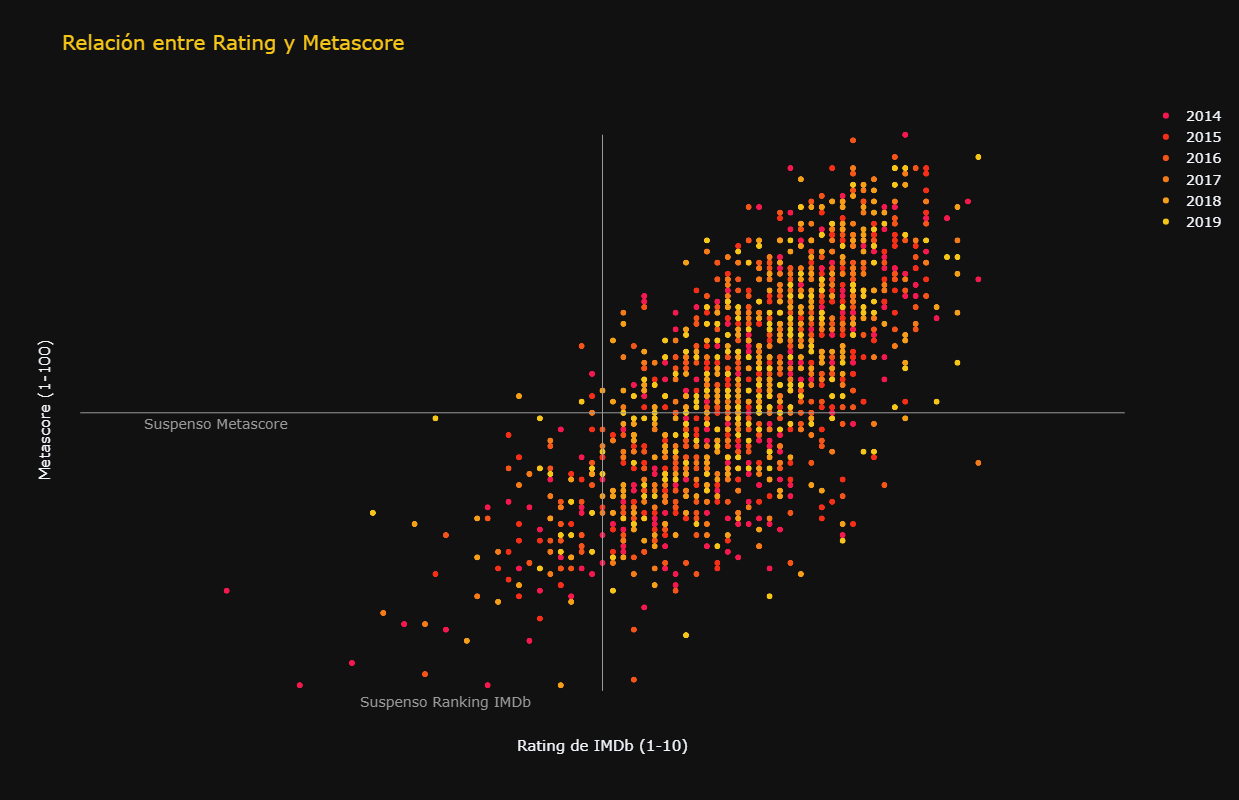

In [47]:
import plotly.express as px

fig = px.scatter(movies[movies.roi<30],
                 x="ratingImdb", y="metascore", color="year", #size='budget',
                 title="Relación entre Rating y Metascore",
                 width=800, height=800,
                 color_discrete_map={ # replaces default color mapping by value
                     2016: "#F55418", 2017: "#F57A18", 2018: "#F59F18", 2019: "#F5C518", 2014: "#F5184F", 2015: "#F52E18"
                 },
                 template="plotly_dark",
                 hover_name="spanishTitle", hover_data=["ratingImdb", "metascore"]
                )

fig.update_layout(
    legend = dict(title = '', font = {'size':14}),
    title = dict(font = {'size':20, 'color': "#F5C518"}),
)

fig.update_xaxes(
    title_text = "Rating de IMDb (1-10)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)

fig.update_yaxes(
    title_text = "Metascore (1-100)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)


gris = '#999'


fig.add_shape( # línea horizontal
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=0, x1=10, xref="x", y0=50, y1=50, yref="y"
)

fig.add_annotation( # texto línea horizontal  
    text="Suspenso Metascore", x=1.3, y=48, showarrow=False, font = {'color': gris, 'size':14}
)

fig.add_shape( # línea vertical
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=5, x1=5, xref="x", y0=0, y1=100, yref="y"
)

fig.add_annotation( # texto línea vertical  
    text="Suspenso Ranking IMDb", x=3.5, y=-2, showarrow=False, font = {'color': gris, 'size':14}
)


fig.show()

---
# Correlación de Rating, Metascore y Presupuesto

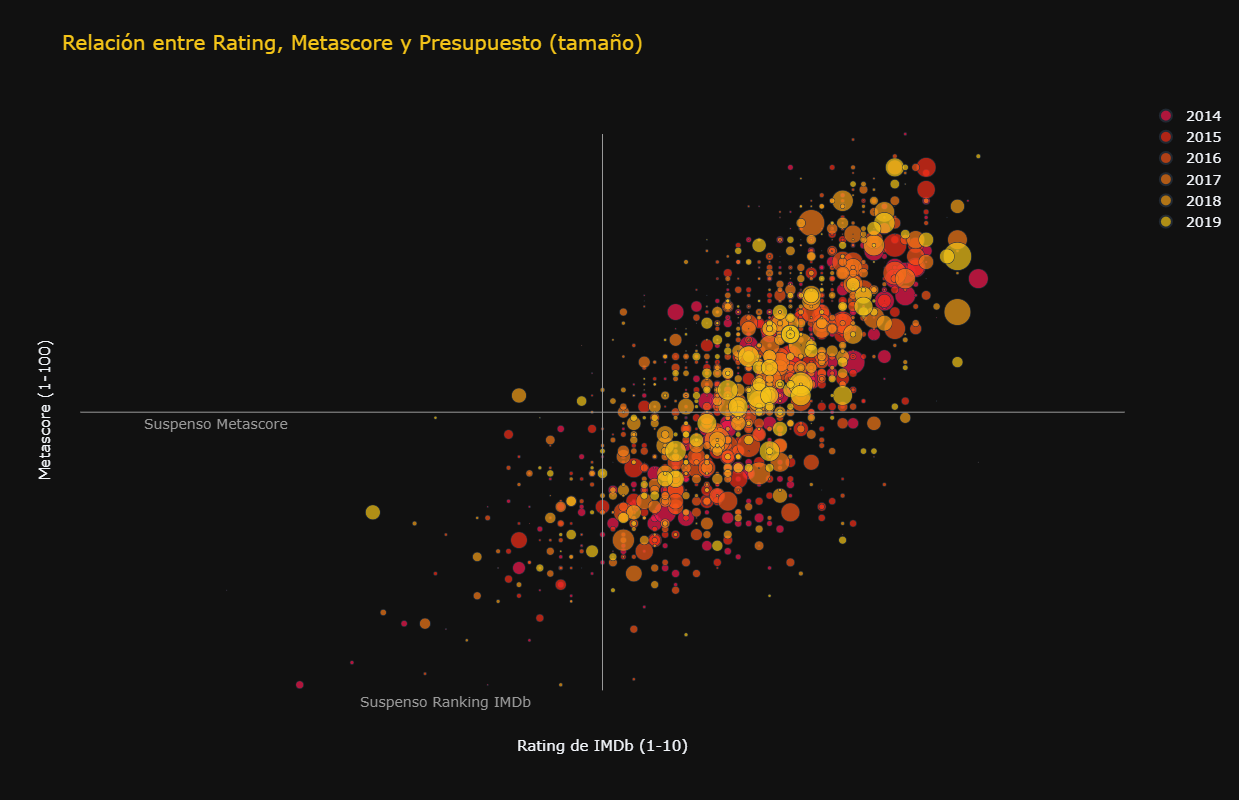

In [48]:
import plotly.express as px

fig = px.scatter(movies,
                 x="ratingImdb", y="metascore", color="year", size='budget',
                 title="Relación entre Rating, Metascore y Presupuesto (tamaño)",
                 width=800, height=800,
                 color_discrete_map={ # replaces default color mapping by value
                     2016: "#F55418", 2017: "#F57A18", 2018: "#F59F18", 2019: "#F5C518", 2014: "#F5184F", 2015: "#F52E18"
                 },
                 template="plotly_dark",
                 hover_name="spanishTitle",
                 hover_data={"ratingImdb": True,
                             "metascore": True,
                             "budget": ':,.0f'
                            }
                )

fig.update_layout(
    legend = dict(title = '', font = {'size':14}),
    title = dict(font = {'size':20, 'color': "#F5C518"}),
)

fig.update_xaxes(
    title_text = "Rating de IMDb (1-10)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)

fig.update_yaxes(
    title_text = "Metascore (1-100)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)


gris = '#999'


fig.add_shape( # línea horizontal
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=0, x1=10, xref="x", y0=50, y1=50, yref="y"
)

fig.add_annotation( # texto línea horizontal  
    text="Suspenso Metascore", x=1.3, y=48, showarrow=False, font = {'color': gris, 'size':14}
)

fig.add_shape( # línea vertical
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=5, x1=5, xref="x", y0=0, y1=100, yref="y"
)

fig.add_annotation( # texto línea vertical  
    text="Suspenso Ranking IMDb", x=3.5, y=-2, showarrow=False, font = {'color': gris, 'size':14}
)


fig.show()

---
# Correlación de Rating, Metascore y Beneficio

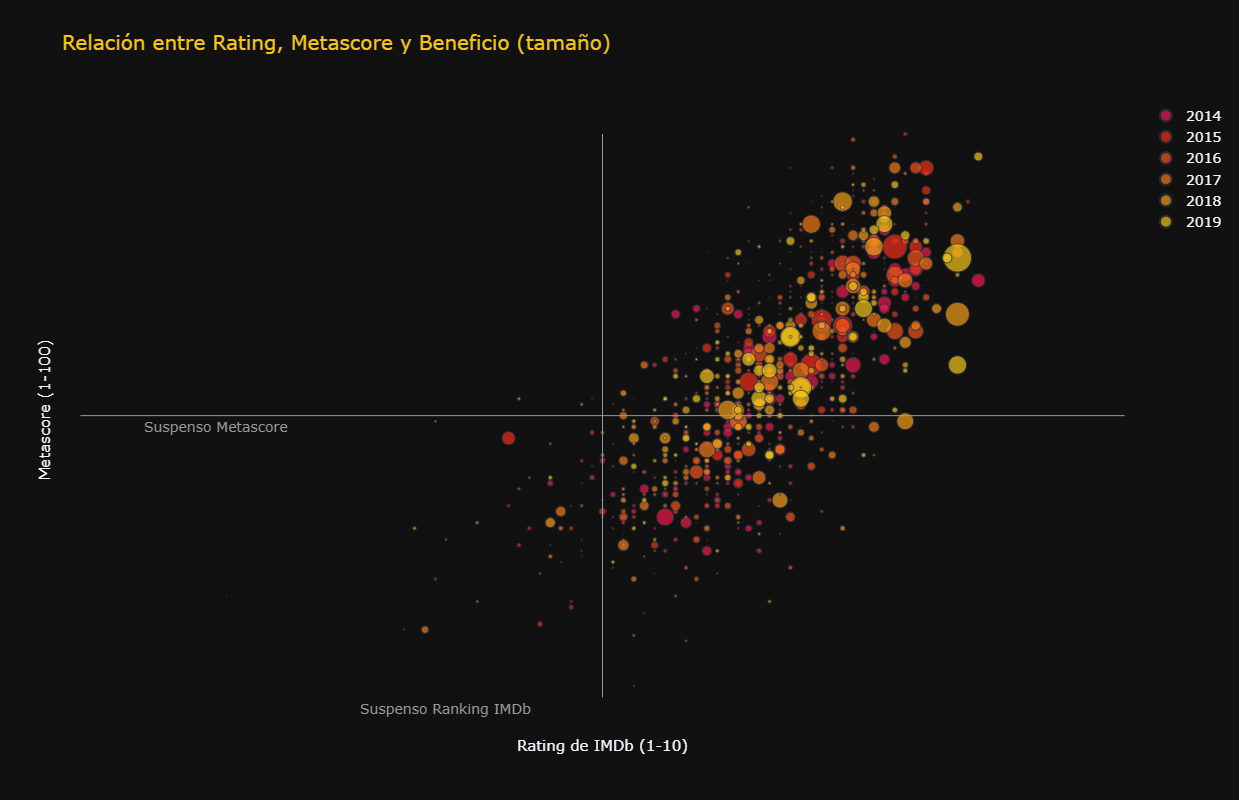

In [49]:
import plotly.express as px

fig = px.scatter(movies[(movies.profit>=0)],
                 x="ratingImdb", y="metascore", color="year", size='profit',
                 title="Relación entre Rating, Metascore y Beneficio (tamaño)",
                 width=800, height=800,
                 color_discrete_map={ # replaces default color mapping by value
                     2016: "#F55418", 2017: "#F57A18", 2018: "#F59F18", 2019: "#F5C518", 2014: "#F5184F", 2015: "#F52E18"
                 },
                 template="plotly_dark",
                 hover_name="spanishTitle",
                 hover_data={"ratingImdb": True,
                             "metascore": True,
                             "profit": ':,.0f'
                            }
                )

fig.update_layout(
    legend = dict(title = '', font = {'size':14}),
    title = dict(font = {'size':20, 'color': "#F5C518"}),
)

fig.update_xaxes(
    title_text = "Rating de IMDb (1-10)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)

fig.update_yaxes(
    title_text = "Metascore (1-100)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)


gris = '#999'


fig.add_shape( # línea horizontal
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=0, x1=10, xref="x", y0=50, y1=50, yref="y"
)

fig.add_annotation( # texto línea horizontal  
    text="Suspenso Metascore", x=1.3, y=48, showarrow=False, font = {'color': gris, 'size':14}
)

fig.add_shape( # línea vertical
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=5, x1=5, xref="x", y0=0, y1=100, yref="y"
)

fig.add_annotation( # texto línea vertical  
    text="Suspenso Ranking IMDb", x=3.5, y=-2, showarrow=False, font = {'color': gris, 'size':14}
)


fig.show()

---
# Correlación de Rating, Metascore y ROI

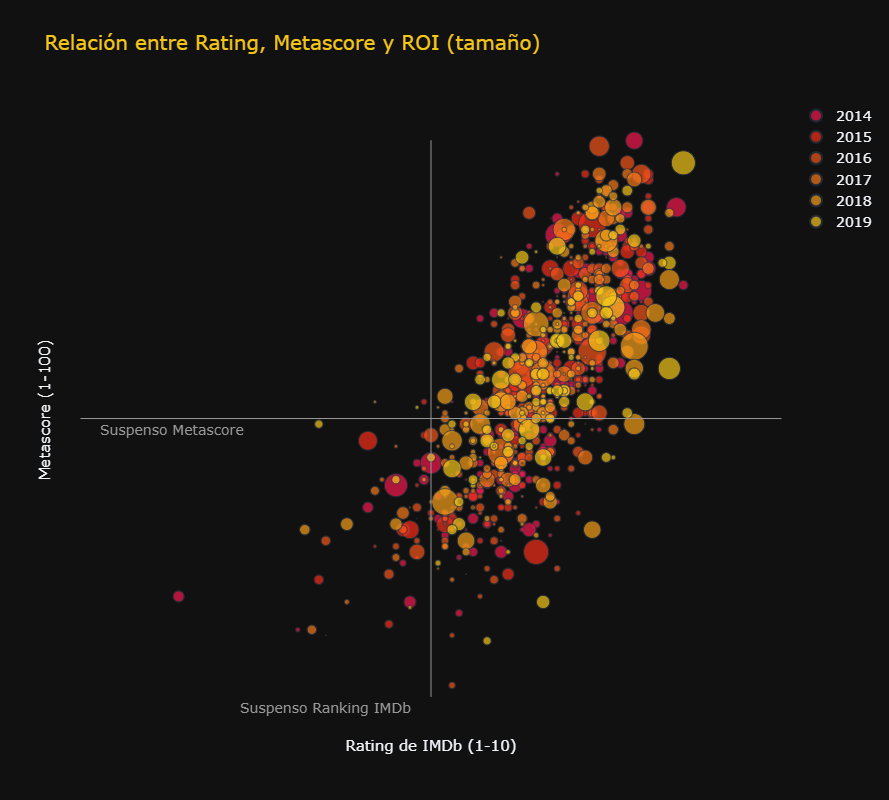

In [50]:
import plotly.express as px

fig = px.scatter(movies[(movies.profit>=0)&(movies.roi<30)],
                 x="ratingImdb", y="metascore", color="year", size='roi',
                 title="Relación entre Rating, Metascore y ROI (tamaño)",
                 width=800, height=800,
                 color_discrete_map={ # replaces default color mapping by value
                     2016: "#F55418", 2017: "#F57A18", 2018: "#F59F18", 2019: "#F5C518", 2014: "#F5184F", 2015: "#F52E18"
                 },
                 template="plotly_dark",
                 hover_name="spanishTitle",
                 hover_data={"ratingImdb": True,
                             "metascore": True,
                             "roi": ':,.2f'
                            }
                )

fig.update_layout(
    legend = dict(title = '', font = {'size':14}),
    title = dict(font = {'size':20, 'color': "#F5C518"}),
)

fig.update_xaxes(
    title_text = "Rating de IMDb (1-10)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)

fig.update_yaxes(
    title_text = "Metascore (1-100)",
    title_font = {"size": 15},
    title_standoff = 20,
    showgrid = False,
    showline = False,
    showticklabels = False,
    zeroline = False
)


gris = '#999'


fig.add_shape( # línea horizontal
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=0, x1=10, xref="x", y0=50, y1=50, yref="y"
)

fig.add_annotation( # texto línea horizontal  
    text="Suspenso Metascore", x=1.3, y=48, showarrow=False, font = {'color': gris, 'size':14}
)

fig.add_shape( # línea vertical
    type="line", line_color=gris, line_width=1, opacity=1,
    x0=5, x1=5, xref="x", y0=0, y1=100, yref="y"
)

fig.add_annotation( # texto línea vertical  
    text="Suspenso Ranking IMDb", x=3.5, y=-2, showarrow=False, font = {'color': gris, 'size':14}
)


fig.show()